# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("bmh")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("crime_reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309778 entries, 0 to 2309777
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21061
Address                             12
Zip Code                         14234
Council District                 47179
APD Sector                        9046
APD District                      9525
PRA                              10796
Census Tract                   1599291
Clearance Status                606751
Clearance Date                  337546
UCR Category                   1521407
Category Description           1521407
X-coordinate                     10211
Y-coordinate                     10211
Latitude                         39035
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2309773,20143561642,DWI,2100,N,12/22/2014 08:18:00 PM,12/22/2014,2018.0,12/22/2014 08:18:00 PM,12/22/2014,2018.0,STREETS / HWY / ROAD / ALLEY,1600 BLOCK E SH 71 EB,78719.0,2.0,HE,8,499.0,NaN,C,01/10/2015,NaN,NaN,3136320.0,3136320.0,30.220608,-97.674384,"(30.22060804, -97.67438354)"
2309774,2008330181,PUBLIC INTOXICATION,2300,N,02/02/2008 01:40:00 AM,02/02/2008,140.0,02/02/2008 01:40:00 AM,02/02/2008,140.0,BAR / NIGHT CLUB,305 W 5TH ST,78701.0,9.0,GE,1,380.0,NaN,C,03/13/2008,NaN,NaN,3113268.0,3113268.0,30.267645,-97.746129,"(30.26764496, -97.74612901)"
2309775,2021410253,CRIMINAL TRESPASS,2716,N,02/10/2021 06:28:00 AM,02/10/2021,628.0,02/10/2021 06:28:00 AM,02/10/2021,628.0,GAS / SERVICE STATIONS,3909 S CONGRESS AVE,78704.0,3.0,DA,2,480.0,NaN,NaN,NaN,NaN,NaN,3108442.0,3108442.0,30.223383,-97.762599,"(30.22338277, -97.76259882)"
2309776,2021370680,POSS OF DRUG PARAPHERNALIA,1818,N,02/06/2021 01:18:00 PM,02/06/2021,1318.0,02/06/2021 01:18:00 PM,02/06/2021,1318.0,STREETS / HWY / ROAD / ALLEY,E 6TH ST / BRAZOS ST,78701.0,9.0,GE,2,381.0,NaN,NaN,NaN,NaN,NaN,3114741.0,3114741.0,30.267683,-97.741461,"(30.26768264, -97.74146079)"
2309777,20061960428,FAMILY DISTURBANCE,3400,N,07/15/2006 03:22:00 AM,07/15/2006,322.0,07/15/2006 04:51:00 AM,07/15/2006,451.0,RESIDENCE / HOME,1648 RUTLAND DR,78758.0,4.0,ED,2,219.0,NaN,NaN,07/17/2006,NaN,NaN,3123188.0,3123188.0,30.374151,-97.711805,"(30.37415093, -97.71180524)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

828

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2308950 entries, 2003-01-01 to 2021-02-13
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21050
address                            12
zip_code                        14229
council_district                47161
apd_sector                       9042
apd_district                     9521
clearance_status               606517
clearance_date                 337387
latitude                        39007
longitude                       39007
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,BURGLARY OF VEHICLE,N,2003-01-01 19:00:00,PARKING LOTS / GARAGE,6700 MIDDLE FISKVILLE RD,78752.0,4.0,ID,8,N,NaT,30.328563,-97.707362,2003,1,1,1
2003-01-01,FAMILY DISTURBANCE,N,2003-01-01 00:27:00,RESIDENCE / HOME,421 THOMPSON LN,78742.0,3.0,HE,5,N,2003-01-13,30.239378,-97.682831,2003,1,1,1
2003-01-01,BURGLARY NON RESIDENCE,N,2003-01-15 18:23:00,COMMERCIAL / OFFICE BUILDING,1611 DUNGAN LN,78754.0,1.0,ED,5,N,NaT,30.350795,-97.672815,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2009-07-22 11:09:00,RESIDENCE / HOME,1941 GASTON PLACE DR,78723.0,1.0,ID,4,N,2009-07-28,30.312126,-97.688964,2003,1,1,1
2003-01-01,DWI,N,2003-01-01 01:55:00,STREETS / HWY / ROAD / ALLEY,1600 BLOCK RUTLAND DR,78758.0,4.0,ED,2,C,2003-01-15,30.373353,-97.712455,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-02-13,FAMILY DISTURBANCE,N,2021-02-13 09:25:00,RESIDENCE / HOME,8601 FIRESIDE DR,78757.0,7.0,ID,7,NaN,NaT,30.366448,-97.722919,2021,2,6,13
2021-02-13,PUBLIC INTOX-SOBERING CENTER,N,2021-02-13 00:44:00,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),1030 NORWOOD PARK BLVD,78753.0,4.0,ID,2,NaN,NaT,30.339153,-97.691169,2021,2,6,13
2021-02-13,BURGLARY OF VEHICLE,N,2021-02-13 03:57:00,BAR / NIGHT CLUB,9515 N LAMAR BLVD,78753.0,4.0,ED,1,NaN,NaT,30.364428,-97.694606,2021,2,6,13
2021-02-13,FAMILY DISTURBANCE,N,2021-02-13 14:59:00,BAR / NIGHT CLUB,715 RED RIVER ST,78701.0,9.0,GE,2,NaN,NaT,30.267866,-97.736253,2021,2,6,13
2021-02-13,THEFT OF BICYCLE,N,2021-02-13 16:46:00,RENTAL STORAGE FACILITY,13126 N FM 620 RD NB,78717.0,6.0,AD,5,NaN,NaT,30.469218,-97.793375,2021,2,6,13


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    207259
78753.0    179519
78701.0    168712
78758.0    159889
78704.0    155110
78745.0    151282
78702.0    137027
78744.0    126694
78723.0    118799
78752.0     84720
78748.0     68397
78759.0     66593
78751.0     64228
78757.0     58140
78705.0     57304
78721.0     47856
78749.0     40552
78724.0     37782
78727.0     35996
78703.0     35292
78731.0     28757
78746.0     28186
78729.0     25382
78750.0     23814
78754.0     22968
Name: zip_code, dtype: int64

78741.0    0.090320
78753.0    0.078231
78701.0    0.073522
78758.0    0.069677
78704.0    0.067594
78745.0    0.065926
78702.0    0.059714
78744.0    0.055211
78723.0    0.051771
78752.0    0.036920
78748.0    0.029806
78759.0    0.029020
78751.0    0.027989
78757.0    0.025336
78705.0    0.024972
78721.0    0.020855
78749.0    0.017672
78724.0    0.016465
78727.0    0.015686
78703.0    0.015380
78731.0    0.012532
78746.0    0.012283
78729.0    0.011061
78750.0    0.010378
78754.0    0.010009
Name: zip_code, dtype: float64

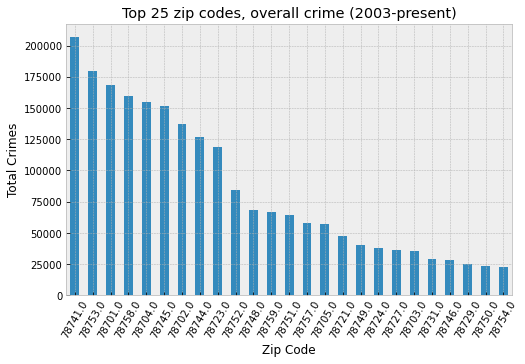

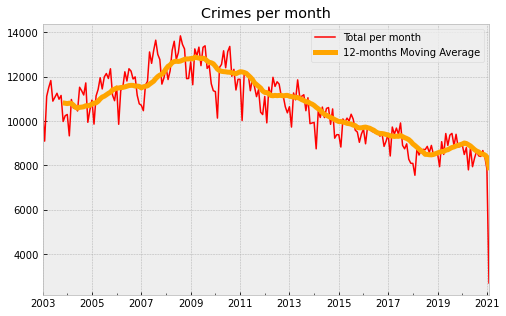

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231351
THEFT                             212039
FAMILY DISTURBANCE                179970
CRIMINAL MISCHIEF                 127752
ASSAULT W/INJURY-FAM/DATE VIOL     78213
BURGLARY OF RESIDENCE              77169
DWI                                69697
PUBLIC INTOXICATION                68782
HARASSMENT                         64413
DISTURBANCE - OTHER                61746
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,FAMILY DISTURBANCE,DWI,CRIMINAL MISCHIEF,PUBLIC INTOXICATION,ASSAULT W/INJURY-FAM/DATE VIOL,BURGLARY OF RESIDENCE,HARASSMENT,TOTAL
occurred_date,,,,,,,,,
2020-10-31,420,881,196,551,74,253,163,205,2743
2020-11-30,482,864,183,507,71,282,162,234,2785
2020-12-31,414,825,166,477,50,253,187,248,2620
2021-01-31,370,816,170,430,55,253,125,243,2462
2021-02-28,177,278,56,135,19,104,46,86,901


<Figure size 432x288 with 0 Axes>

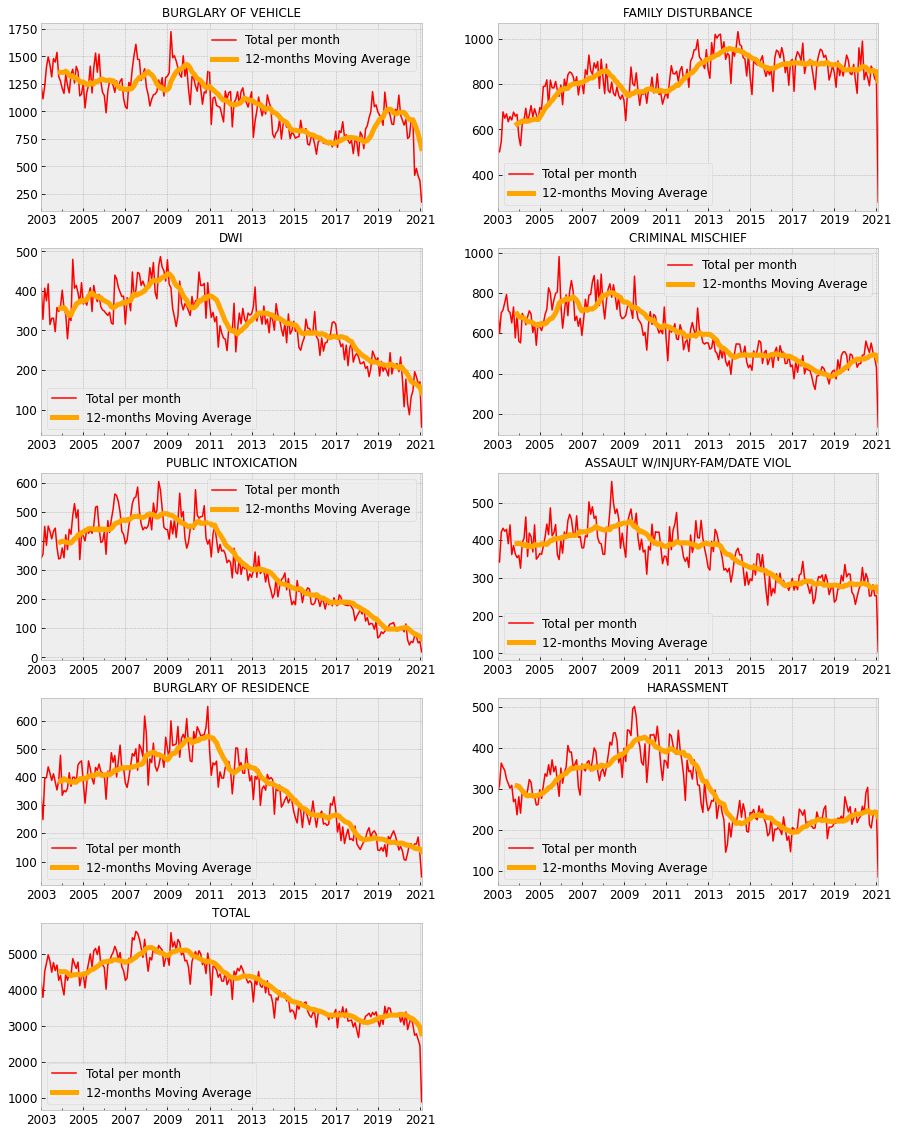

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17150
THEFT                             15793
BURGLARY OF VEHICLE                9274
WARRANT ARREST NON TRAFFIC         8966
DWI                                8325
ASSAULT WITH INJURY                7539
VIOL CITY ORDINANCE - OTHER        6187
POSS OF DRUG PARAPHERNALIA         6049
CRIMINAL MISCHIEF                  5830
CRIMINAL TRESPASS                  3921
POSSESSION OF MARIJUANA            3385
DISTURBANCE - OTHER                3359
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2902
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2595
CRIMINAL TRESPASS/TRANSIENT        2585
THEFT OF BICYCLE                   2516
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2169
DOC FIGHTING                       2110
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1732
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101653
THEFT                             0.093609
BURGLARY OF VEHICLE               0.054969
WARRANT ARREST NON TRAFFIC        0.053144
DWI                               0.049344
ASSAULT WITH INJURY               0.044686
VIOL CITY ORDINANCE - OTHER       0.036672
POSS OF DRUG PARAPHERNALIA        0.035854
CRIMINAL MISCHIEF                 0.034556
CRIMINAL TRESPASS                 0.023241
POSSESSION OF MARIJUANA           0.020064
DISTURBANCE - OTHER               0.019910
CUSTODY ARREST TRAFFIC WARR       0.017740
POSS CONTROLLED SUB/NARCOTIC      0.017201
CAMPING IN PARK                   0.016507
VOCO - ALCOHOL  CONSUMPTION       0.015944
ASSAULT BY CONTACT                0.015381
CRIMINAL TRESPASS/TRANSIENT       0.015322
THEFT OF BICYCLE                  0.014913
URINATING IN PUBLIC PLACE         0.013846
FAMILY DISTURBANCE                0.012856
DOC FIGHTING                      0.012507
PROTECTIVE ORDER                  0.012441
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

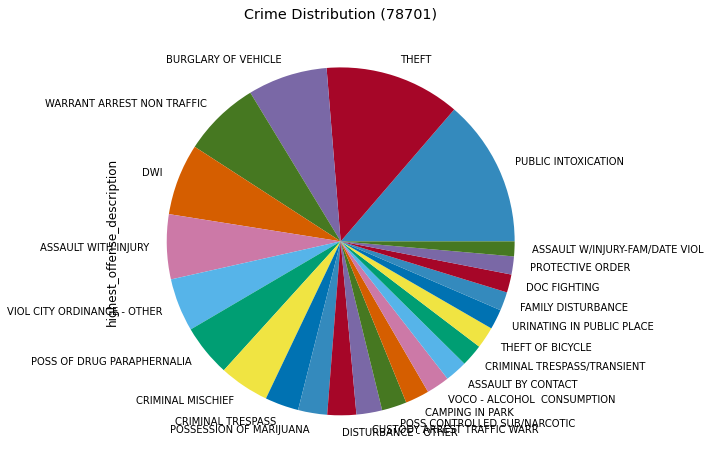

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17173
BURGLARY OF VEHICLE               15951
FAMILY DISTURBANCE                14694
CRIMINAL MISCHIEF                  9483
THEFT BY SHOPLIFTING               7639
ASSAULT W/INJURY-FAM/DATE VIOL     7175
BURGLARY OF RESIDENCE              6075
DWI                                5031
DISTURBANCE - OTHER                4776
CUSTODY ARREST TRAFFIC WARR        4349
HARASSMENT                         4265
AUTO THEFT                         4238
POSS OF DRUG PARAPHERNALIA         3729
PUBLIC INTOXICATION                3371
ASSAULT WITH INJURY                3315
CRIMINAL TRESPASS                  3147
POSS CONTROLLED SUB/NARCOTIC       2978
RUNAWAY CHILD                      2935
WARRANT ARREST NON TRAFFIC         2797
POSSESSION OF MARIJUANA            2710
BURGLARY NON RESIDENCE             2489
VIOL CITY ORDINANCE - OTHER        1868
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

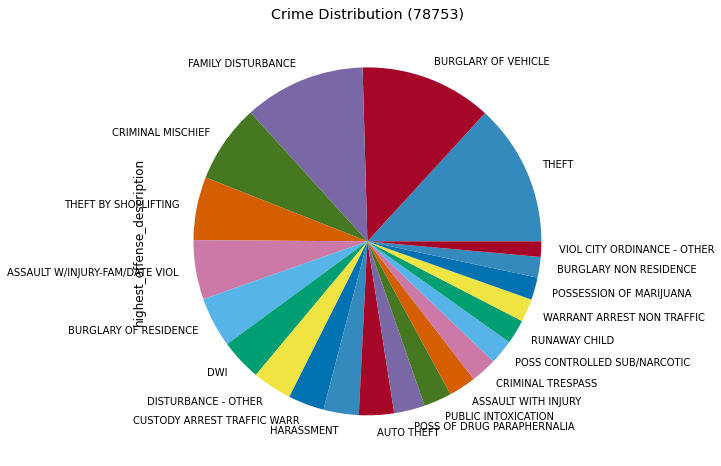

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20400
BURGLARY OF VEHICLE               19824
THEFT                             15612
CRIMINAL MISCHIEF                 11061
ASSAULT W/INJURY-FAM/DATE VIOL     9636
BURGLARY OF RESIDENCE              8887
PUBLIC INTOXICATION                6384
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5666
HARASSMENT                         5531
DISTURBANCE - OTHER                5178
AUTO THEFT                         4645
ASSAULT WITH INJURY                4542
CRIMINAL TRESPASS                  3925
POSS CONTROLLED SUB/NARCOTIC       3870
POSSESSION OF MARIJUANA            3794
THEFT BY SHOPLIFTING               3580
POSS OF DRUG PARAPHERNALIA         3541
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2793
VIOL CITY ORDINANCE - OTHER        2195
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098428
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

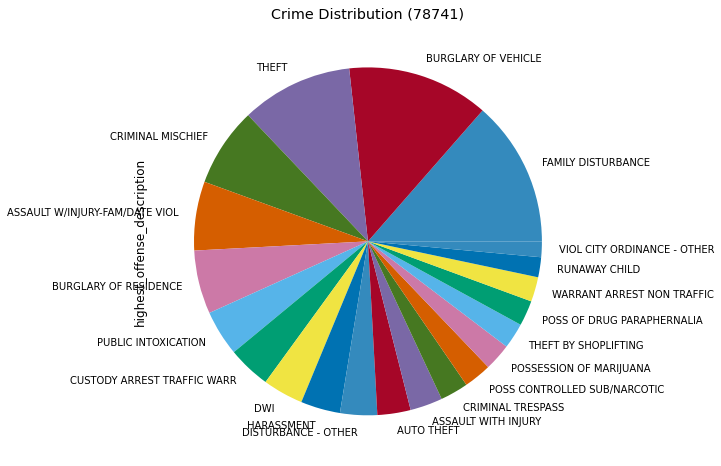

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                14975
BURGLARY OF VEHICLE               14754
THEFT                             13588
CRIMINAL MISCHIEF                  8533
BURGLARY OF RESIDENCE              5872
ASSAULT W/INJURY-FAM/DATE VIOL     5764
HARASSMENT                         5154
DISTURBANCE - OTHER                4529
DWI                                4425
PUBLIC INTOXICATION                3999
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2876
AUTO THEFT                         2859
ASSAULT WITH INJURY                2675
RUNAWAY CHILD                      2603
POSSESSION OF MARIJUANA            2592
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2023
THEFT BY SHOPLIFTING               1993
CRIMINAL TRESPASS                  1958
IDENTITY THEFT                     1590
POSS OF DRUG PARAPHERNALIA         1520
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

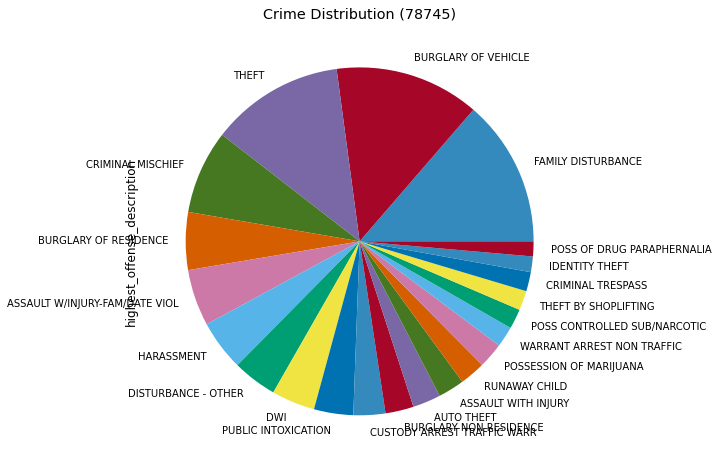

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8638
THEFT                             5617
CRIMINAL MISCHIEF                 4976
THEFT OF BICYCLE                  3493
PUBLIC INTOXICATION               2628
BURGLARY OF RESIDENCE             2122
WARRANT ARREST NON TRAFFIC        1550
CRIMINAL TRESPASS                 1351
AUTO THEFT                        1320
ASSAULT WITH INJURY               1252
HARASSMENT                        1219
DWI                               1215
FAMILY DISTURBANCE                1195
DISTURBANCE - OTHER               1118
BURGLARY NON RESIDENCE             881
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        791
CUSTODY ARREST TRAFFIC WARR        782
GRAFFITI                           780
ASSAULT W/INJURY-FAM/DATE VIOL     693
POSSESSION OF MARIJUANA            658
ASSAULT BY CONTACT                 619
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150740
THEFT                             0.098021
CRIMINAL MISCHIEF                 0.086835
THEFT OF BICYCLE                  0.060956
PUBLIC INTOXICATION               0.045861
BURGLARY OF RESIDENCE             0.037031
WARRANT ARREST NON TRAFFIC        0.027049
CRIMINAL TRESPASS                 0.023576
AUTO THEFT                        0.023035
ASSAULT WITH INJURY               0.021848
HARASSMENT                        0.021273
DWI                               0.021203
FAMILY DISTURBANCE                0.020854
DISTURBANCE - OTHER               0.019510
BURGLARY NON RESIDENCE            0.015374
CRIMINAL TRESPASS/TRANSIENT       0.015147
VIOL CITY ORDINANCE - OTHER       0.013804
CUSTODY ARREST TRAFFIC WARR       0.013647
GRAFFITI                          0.013612
ASSAULT W/INJURY-FAM/DATE VIOL    0.012093
POSSESSION OF MARIJUANA           0.011483
ASSAULT BY CONTACT                0.010802
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

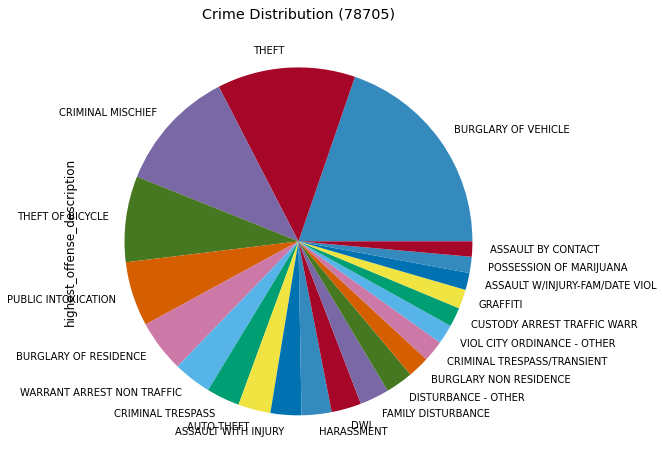

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5389
THEFT                             5090
THEFT BY SHOPLIFTING              2544
CRIMINAL MISCHIEF                 1275
DWI                                881
FAMILY DISTURBANCE                 759
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         626
AUTO THEFT                         607
BURGLARY OF RESIDENCE              521
THEFT FROM PERSON                  462
DISTURBANCE - OTHER                433
IDENTITY THEFT                     429
BURGLARY NON RESIDENCE             357
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            326
PUBLIC INTOXICATION                320
POSSESSION OF MARIJUANA            298
FRAUD - OTHER                      280
SUSPICIOUS PERSON                  256
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                198
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191194
THEFT                             0.180586
THEFT BY SHOPLIFTING              0.090258
CRIMINAL MISCHIEF                 0.045235
DWI                               0.031257
FAMILY DISTURBANCE                0.026928
VIOL CITY ORDINANCE - OTHER       0.023132
HARASSMENT                        0.022210
AUTO THEFT                        0.021536
BURGLARY OF RESIDENCE             0.018484
THEFT FROM PERSON                 0.016391
DISTURBANCE - OTHER               0.015362
IDENTITY THEFT                    0.015220
BURGLARY NON RESIDENCE            0.012666
ASSAULT W/INJURY-FAM/DATE VIOL    0.012063
CRED CARD ABUSE - OTHER           0.011566
PUBLIC INTOXICATION               0.011353
POSSESSION OF MARIJUANA           0.010573
FRAUD - OTHER                     0.009934
SUSPICIOUS PERSON                 0.009083
CUSTODY ARREST TRAFFIC WARR       0.008763
WARRANT ARREST NON TRAFFIC        0.007912
ASSAULT WITH INJURY               0.007025
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

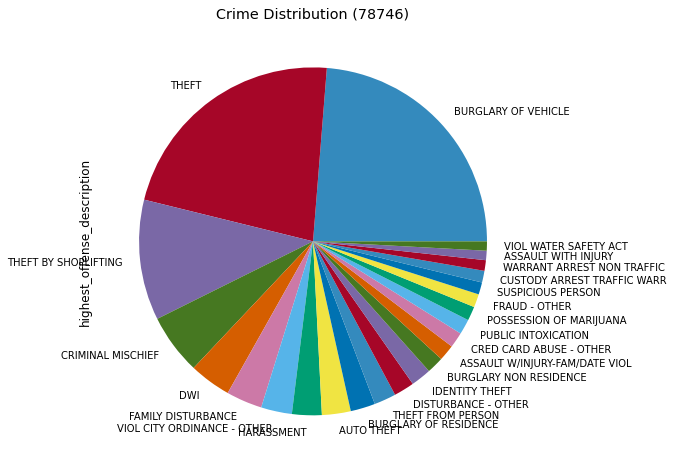

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130777
78753.0    0.099070
78758.0    0.094336
78701.0    0.074447
78723.0    0.074379
78702.0    0.074141
78745.0    0.057726
78752.0    0.052379
78744.0    0.052038
78704.0    0.048428
78721.0    0.027994
78724.0    0.024555
78705.0    0.021456
78757.0    0.020740
78748.0    0.017505
78751.0    0.017062
78759.0    0.013554
78722.0    0.009434
78754.0    0.008344
78727.0    0.007969
78749.0    0.007833
78617.0    0.007731
78729.0    0.007084
78750.0    0.005687
78731.0    0.005279
Name: zip_code, dtype: float64

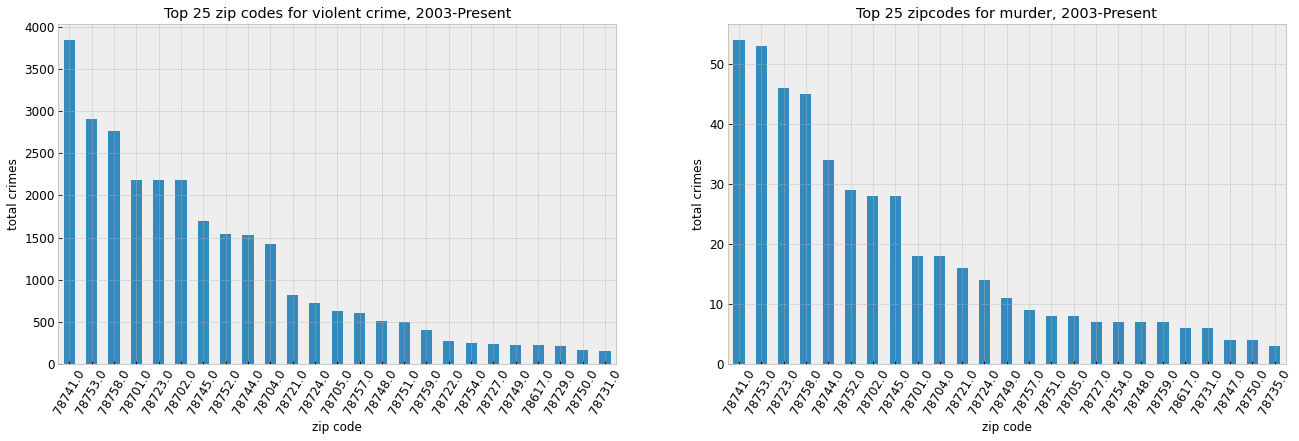

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

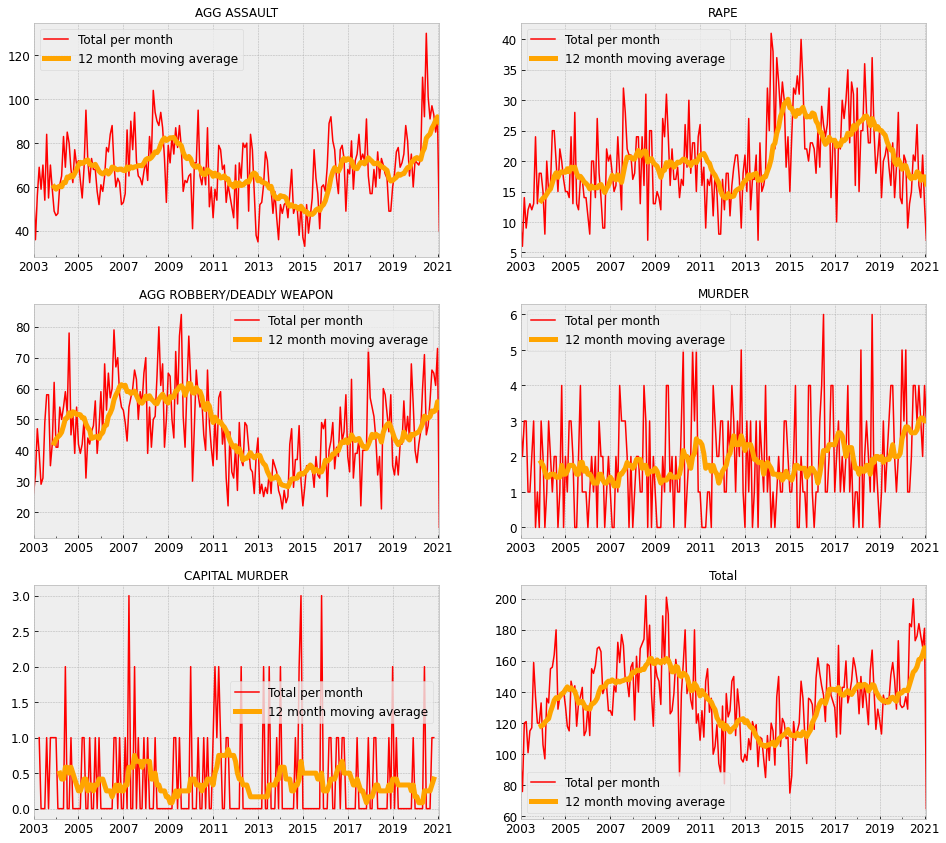

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

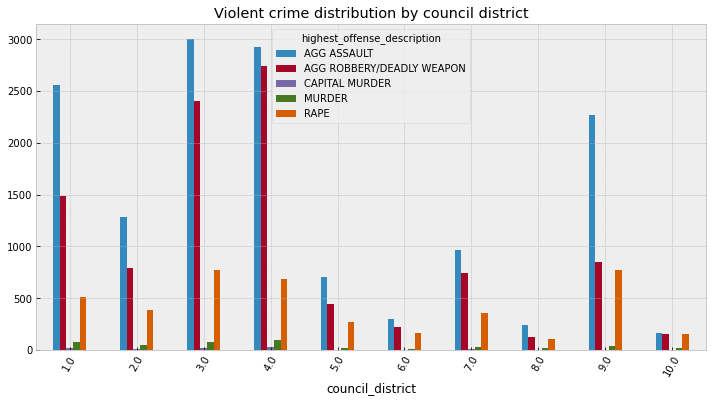

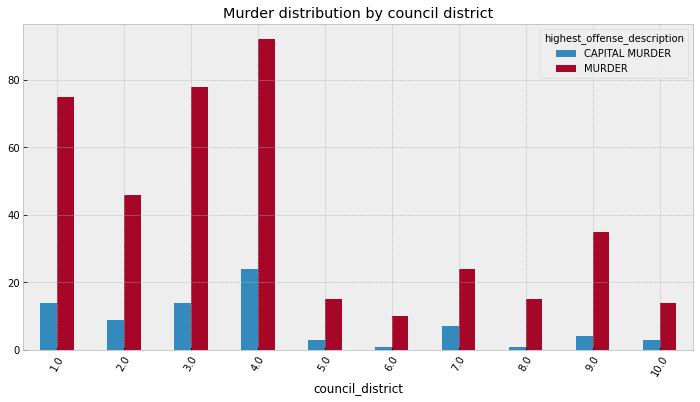

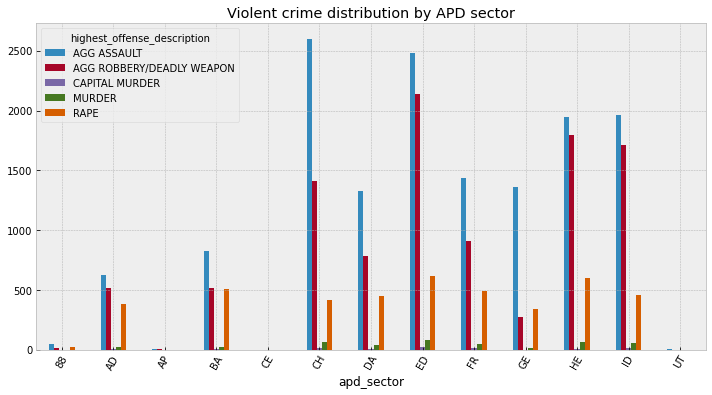

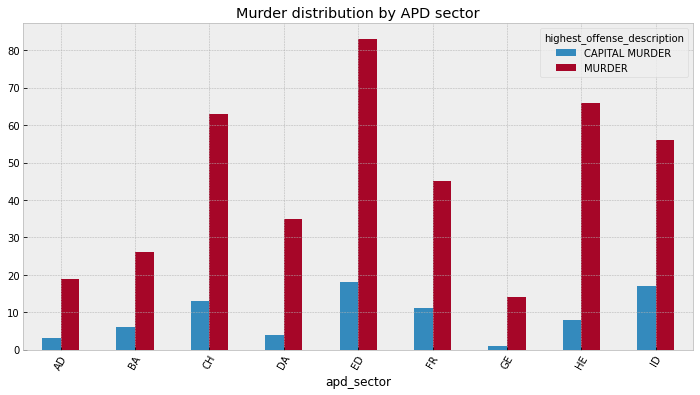

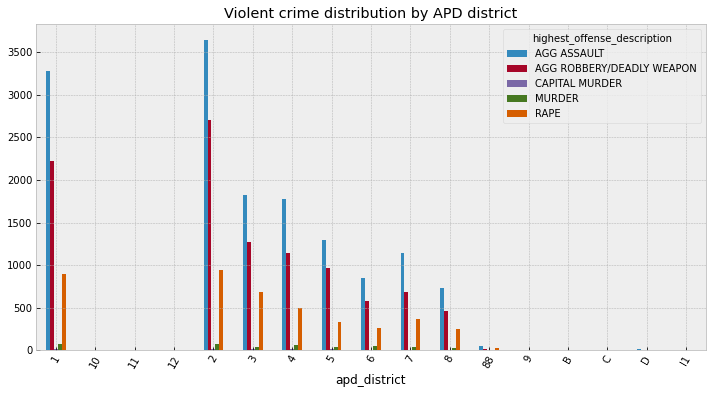

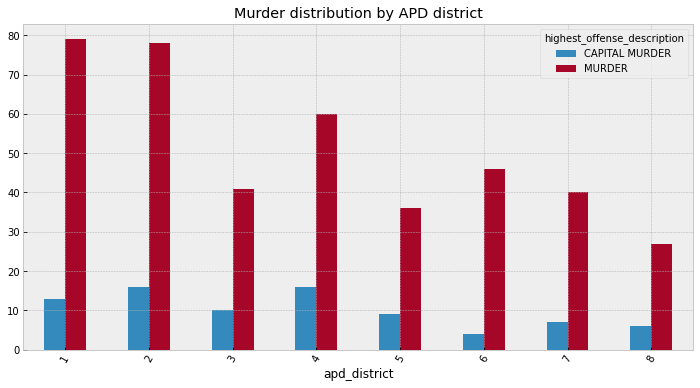

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,657,45,2,7,78
CAMP / CAMPGROUND,21,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


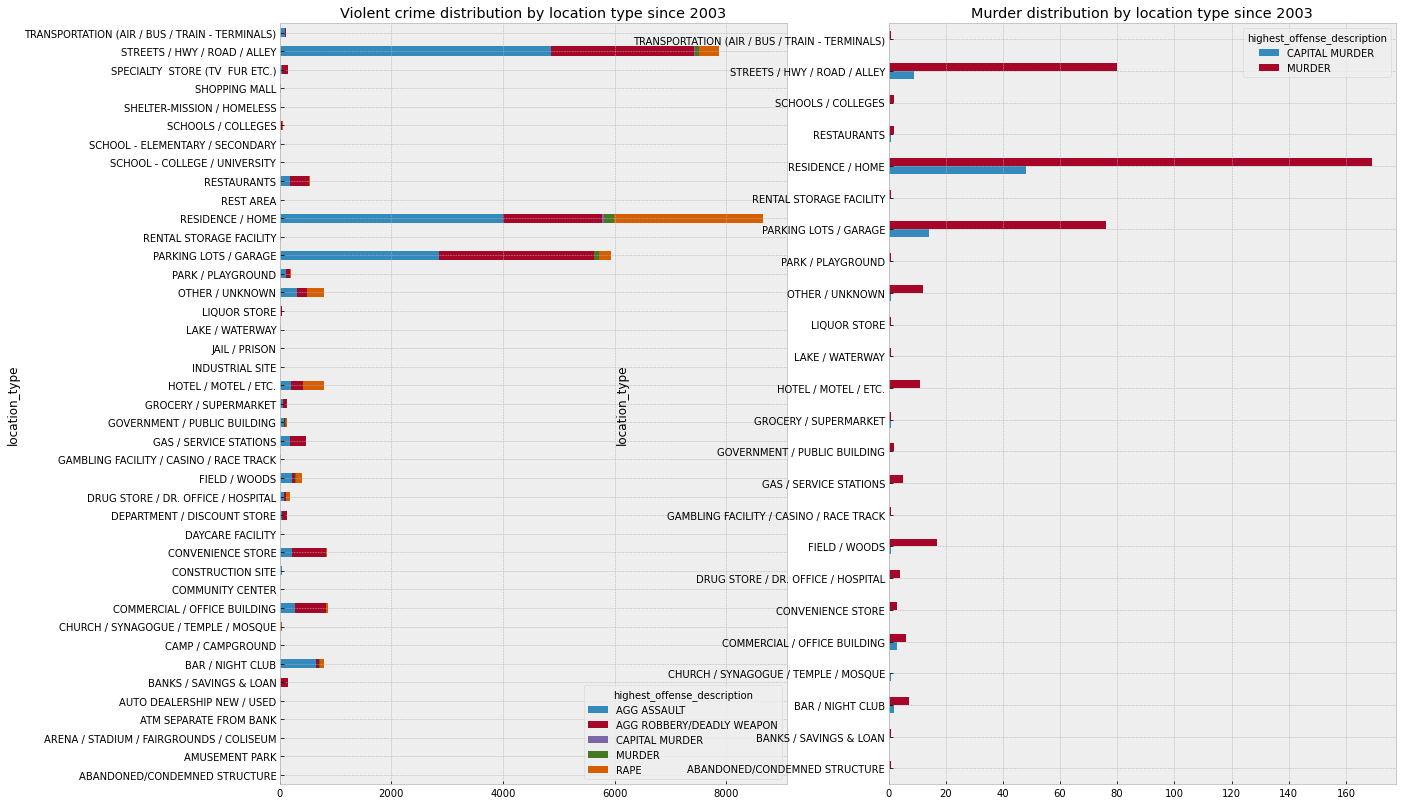

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
6409 SPRINGDALE RD          59
00 BLOCK UNKNOWN            59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         55
9200 NORTH PLZ              53
1030 NORWOOD PARK BLVD      53
1071 CLAYTON LN             53
2237 E RIVERSIDE DR         51
1137 GUNTER ST              51
1124 RUTLAND DR             50
Name: address, dtype: int64

In [24]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

4700 E RIVERSIDE DR          3
8800 N IH 35 SVRD SB         3
8610 N LAMAR BLVD            3
6409 SPRINGDALE RD           3
6407 SPRINGDALE RD           3
2501 ANKEN DR                2
10503 N LAMAR BLVD           2
833 FAIRFIELD DR             2
9010 GALEWOOD DR             2
8912 N LAMAR BLVD            2
9220 N IH 35 SVRD SB         2
744 W WILLIAM CANNON DR      2
1050 SPRINGDALE RD           2
9200 NORTH PLZ               2
10610 MORADO CIR             2
1137 GUNTER ST               2
2400 WICKERSHAM LN           2
605 MASTERSON PASS           2
9601 MIDDLE FISKVILLE RD     2
6600 ED BLUESTEIN BLVD SB    2
6118 FAIRWAY ST              2
815 W SLAUGHTER LN           2
8225 SAM RAYBURN DR          2
7000 DECKER LN               2
2508 E RIVERSIDE DR          2
1711 RUTLAND DR              2
2915 S IH 35 SVRD NB         2
2713 S CONGRESS AVE          2
201 W 5TH ST                 2
601 E 15TH ST                2
Name: address, dtype: int64

In [25]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")